# Introducing Julia

Robin Deits
Dec. 2, 2015

# What is Julia? 

* "Julia is a new general-purpose programming language, designed for scientific computing"
* "Julia is a high-level, JIT-compiled, garbage-collected, dynamic language"
* "Julia is *fast*"
* "Julia is *free*"

# Julia is...

* like Python: little boilerplate, readable code, list comprehensions
* like Matlab: clean, terse syntax for math expressions
    * `x = A \ b`
* like C++: polymorphic functions, templates 
    * (but only when you want them ;-) )

# Julia is not...

...a Matlab clone

Julia uses Matlab function names when convenient, but the fundamentals of the language are very different (not everything is a matrix...)

# A Tour of Julia

Let's learn by doing...

# Variables

In [1]:
x = 1

1

# Vectors

In [2]:
v = [1, 2, 3, 4]
norm(v)

5.477225575051661

# Matrices

In [3]:
A = [1 2; 3 4]
b = [4, 5]
x = A \ b

2-element Array{Float64,1}:
 -3.0
  3.5

# Functions

In [4]:
function say_hello(name)
    println("hello, ", name)
end
say_hello("world")

hello, world

# Types

In [5]:
abstract Animal

type Dog <: Animal
    name
end

type Cat <: Animal
    name
end

In [6]:
function speak(d::Dog)
    println("woof")
end

function speak(c::Cat)
    println("meow")
end

dog = Dog("fido")
cat = Cat("felix")
speak(dog)
speak(cat)

# Methods with and without types:

In [7]:
function speak(c::Cat)
    println("meow")
end

function speak(x)
    println("hi there, I'm: ", x)
end

cat = Cat("felix")
speak(cat)
speak(3.14159)

# Methods for abstract types

In [8]:
# abstract Animal

# type Dog <: Animal
#     name
# end

# type Cat <: Animal
#     name
# end

function jump(a::Animal)
    println(a.name, " jumping")
end

jump(cat)
jump(dog)


woof
meow
meow
hi there, I'm: 3.14159
felix jumping

# Packages and Plotting

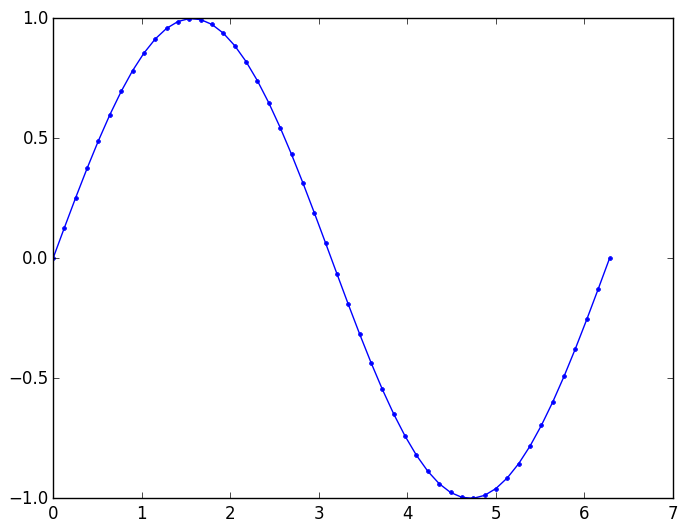

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e1378d0>


fido jumping


In [9]:
# Pkg.add("PyPlot") # install "PyPlot" from the internet
using PyPlot # import functions from PyPlot into our workspace
x = linspace(0, 2*pi)
plot(x, sin(x), "b.-")

# LQR

In [5]:
# Pkg.clone("https://github.com/JuliaControl/Control.jl.git")
using Control
A = [1.0 2; 3 4]
B = [1.0 0; 0 1]
Q = eye(2)
R = 0.1 * eye(2)
K = lqr(A, B, Q, R)
@show K

println("\n--------\n")

@time for j = 1:1000; K = lqr(A, B, Q, R); end

K = [5.353949274783947 4.021335259651989
 4.021335259651994 9.090599548981206]

--------

  0.043779 seconds (105.00 k allocations: 19.028 MB, 15.14% gc time)


### Equivalent Matlab code:

```
>> A = [1.0 2; 3 4];
>> B = [1.0 0; 0 1];
>> Q = eye(2);
>> R = 0.1 * eye(2);
>> K = lqr(A, B, Q, R)

K =

    5.3539    4.0213
    4.0213    9.0906

>> tic(); for j = 1:1000; K = lqr(A, B, Q, R); end; toc()
Elapsed time is 2.058313 seconds.
```


In [6]:
2.058 / 0.0438

46.986301369863014

# Metaprogramming

In [12]:
expression = :(2 * x + y)
dump(expression)

0.773784 seconds (1.04 M allocations: 62.017 MB, 2.37% gc time)
Expr 
  head: Symbol call
  args: Array(Any,(3,))
    1: Symbol +
    2: Expr 
      head: Symbol call
      args: Array(Any,(3,))
        1: Symbol *
        2: Int64 

# True (not textual) Macros

In [13]:
@assert 1 == 2

# Compare with Matlab:
# >> assert(1 == 2)
# Assertion failed.

LoadError: LoadError: AssertionError: 1 == 2
while loading In[13], in expression starting on line 1

In [14]:
macroexpand(:(@assert 1 == 2))

:(if 1 == 2
        nothing
    else 
        Base.throw(Base.Main.Base.AssertionError("1 == 2"))
    end)

2
        3: Symbol x
      typ: Any
    3: Symbol y
  typ: Any


# Julia all the way down (mostly)

In [15]:
A = [1.0 2.0; 3.0 4.0]
@which inv(A)

inv{T}(A::Union{DenseArray{T,2},SubArray{T,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}) at linalg/dense.jl:353

In [16]:
using JuMP
using Gurobi

In [17]:
m = Model(solver=GurobiSolver())
@defVar(m, x[1:10])
@addConstraint(m, x[1] == 0)
@addConstraint(m, x[end] == 9)
m

Feasibility problem with:
 * 2 linear constraints
 * 10 variables
Solver set to Gurobi.Gurobi

In [18]:
cost = zero(x[1])
for j = 2:length(x)
    cost += (x[j] - x[j-1])^2
end
@setObjective(m, Min, cost)

:Min

In [19]:
status = solve(m)
y = map(getValue, x)

Optimize a model with 2 rows, 10 columns and 2 nonzeros
Model has 19 quadratic objective terms
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [0e+00, 0e+00]
  Bounds range    [0e+00, 0e+00]
  RHS range       [9e+00, 9e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 0 rows, 8 columns, 0 nonzeros
Presolved model has 15 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 15
 AA' NZ     : 1.300e+01
 Factor NZ  : 2.800e+01
 Factor Ops : 1.400e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.10000000e+01  8.10000000e+01  0.00e+00 9.00e+00  0.00e+00     0s
   1   9.00000000e+00  9.00028400e+00  2.53e-15 9.00e-06  0.00e+00     0s
   2   9.00000000e+00  9.00000000e+00  3.36e-15 3.18e-11  0.00e+00     0s

Barrier solved model in 2 iterations and 0.00 seconds
Optimal object

10-element Array{Float64,1}:
 -0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0

In [28]:
function optimize()
    m = Model(solver=GurobiSolver(OutputFlag=0))
    @defVar(m, x[1:10])
    @addConstraint(m, x[1] == 0)
    @addConstraint(m, x[end] == 8)
    cost = zero(x[1])
    for j = 2:length(x)
        cost += (x[j] + x[j-1])^2
    end
    @setObjective(m, Min, cost)
    status = solve(m)
    return map(getValue, x)
end

@time for j = 1:100; optimize(); end
    

  0.097753 seconds (66.80 k allocations: 5.151 MB)


### Matlab (yalmip) implementation

```
function y = yalmip_qp()
  x = sdpvar(10, 1, 'full');
  cost = 0;
  for j = 2:length(x)
    cost = cost + (x(j) - x(j-1))^2;
  end
  constraints = [x(1) == 0, x(end) == 9];
  params = sdpsettings('solver', 'gurobi', 'verbose', 0);
  optimize(constraints, cost, params);
  y = double(x);
end
```

### Results
```
>> t0 = tic(); for j = 1:100; yalmip_qp(); end; toc(t0)
Elapsed time is 14.343800 seconds.
```

In [29]:
14.34 / 0.0978

146.62576687116564

# Matlab (drake QuadraticProgram) implementation

```
function y = drake_qp()
  nv = 10;
  Q = zeros(nv, nv);
  for j = 2:nv
    Q(j,j) = Q(j,j) + 1;
    Q(j-1, j-1) = Q(j-1, j-1) + 1;
    Q(j, j-1) = Q(j, j-1) - 1;
    Q(j-1, j) = Q(j-1, j) - 1;
  end
  Aeq = zeros(2, nv);
  beq = zeros(2, 1);
  Aeq(1, 1) = 1;
  beq(1) = 0;
  Aeq(2, 10) = 1;
  beq(2) = 9;

  prog = QuadraticProgram(Q, zeros(nv, 1), [], [], Aeq, beq);
  prog = prog.setSolver('gurobi');
  y = prog.solve();
end
```

## Results

```
>> t0 = tic(); for j = 1:100; drake_qp(); end; toc(t0);
Elapsed time is 0.526965 seconds.
```

In [30]:
0.527 / 0.0978

5.388548057259714

# Matlab (spotless) implementation

```
function y = spotless_qp()

  prog = spotsosprog();
  [prog, x] = prog.newFree(10, 1);
  prog = prog.withEqs(x([1,10]) - [0; 9]);
  obj = 0;
  for j = 2:10
    obj = obj + (x(j) - x(j-1))^2;
  end
  result = minimize(prog, obj, @spot_mosek);
  y = double(result.eval(x));
end
```

## Results

```
>> t0 = tic(); for j = 1:100; spotless_qp(); end; toc(t0)
Elapsed time is 3.996355 seconds.
```

**but it gives the wrong answer** (spotless can't handle quadratic objectives?)
See: <https://github.com/spot-toolbox/spotless/issues/14>

In [31]:
3.996 / .0978

40.858895705521476

# Check it out
 
<http://julialang.org/>
